In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 1000

%matplotlib inline

In [20]:
loans = pd.read_csv('data/prosperLoanData.csv')

In [21]:
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [22]:
loans.columns

Index([u'ListingKey', u'ListingNumber', u'ListingCreationDate', u'CreditGrade',
       u'Term', u'LoanStatus', u'ClosedDate', u'BorrowerAPR', u'BorrowerRate',
       u'LenderYield', u'EstimatedEffectiveYield', u'EstimatedLoss',
       u'EstimatedReturn', u'ProsperRating (numeric)',
       u'ProsperRating (Alpha)', u'ProsperScore', u'ListingCategory (numeric)',
       u'BorrowerState', u'Occupation', u'EmploymentStatus',
       u'EmploymentStatusDuration', u'IsBorrowerHomeowner',
       u'CurrentlyInGroup', u'GroupKey', u'DateCreditPulled',
       u'CreditScoreRangeLower', u'CreditScoreRangeUpper',
       u'FirstRecordedCreditLine', u'CurrentCreditLines', u'OpenCreditLines',
       u'TotalCreditLinespast7years', u'OpenRevolvingAccounts',
       u'OpenRevolvingMonthlyPayment', u'InquiriesLast6Months',
       u'TotalInquiries', u'CurrentDelinquencies', u'AmountDelinquent',
       u'DelinquenciesLast7Years', u'PublicRecordsLast10Years',
       u'PublicRecordsLast12Months', u'RevolvingCredi

In [23]:
loans.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [24]:
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [25]:
loans.BorrowerState.value_counts().head()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
Name: BorrowerState, dtype: int64

In [26]:
loans.EmploymentStatus.value_counts().head(10)

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [27]:
loans.median()

ListingNumber                          600554.000000
Term                                       36.000000
BorrowerAPR                                 0.209760
BorrowerRate                                0.184000
LenderYield                                 0.173000
EstimatedEffectiveYield                     0.161500
EstimatedLoss                               0.072400
EstimatedReturn                             0.091700
ProsperRating (numeric)                     4.000000
ProsperScore                                6.000000
ListingCategory (numeric)                   1.000000
EmploymentStatusDuration                   67.000000
IsBorrowerHomeowner                         1.000000
CurrentlyInGroup                            0.000000
CreditScoreRangeLower                     680.000000
CreditScoreRangeUpper                     699.000000
CurrentCreditLines                         10.000000
OpenCreditLines                             9.000000
TotalCreditLinespast7years                 25.

In [28]:
# time trends - 
# state trends - over time 
# credit score trends

In [29]:
loans[~loans.BorrowerState.isnull()].count()

ListingKey                             108422
ListingNumber                          108422
ListingCreationDate                    108422
CreditGrade                             23438
Term                                   108422
LoanStatus                             108422
ClosedDate                              49574
BorrowerAPR                            108422
BorrowerRate                           108422
LenderYield                            108422
EstimatedEffectiveYield                 84853
EstimatedLoss                           84853
EstimatedReturn                         84853
ProsperRating (numeric)                 84853
ProsperRating (Alpha)                   84853
ProsperScore                            84853
ListingCategory (numeric)              108422
BorrowerState                          108422
Occupation                             106221
EmploymentStatus                       107554
EmploymentStatusDuration               104572
IsBorrowerHomeowner               

In [30]:
# 
apr = pd.DataFrame(loans.groupby(['BorrowerState']).BorrowerAPR.median().sort_values())
dti = pd.DataFrame(loans.groupby(['BorrowerState']).DebtToIncomeRatio.median().sort_values())

apr.merge(dti,left_index=True,right_index=True)

,BorrowerAPR,DebtToIncomeRatio
BorrowerState,,
ME,0.164970,0.220
IA,0.168470,0.260
DC,0.186255,0.180
AK,0.195460,0.240
MA,0.198900,0.200
DE,0.198900,0.230
CO,0.199895,0.230
OK,0.199910,0.245
WI,0.202000,0.230


In [31]:
loans.index = pd.to_datetime(loans.LoanOriginationDate)

In [32]:
by_month = loans[loans.index < '2014-03-01'].groupby(pd.TimeGrouper('M'))['ListingNumber'].count()

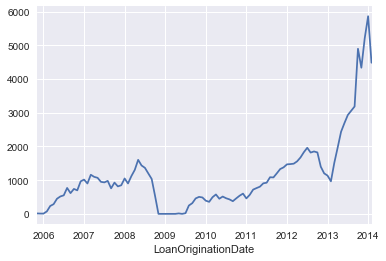

In [33]:
by_month.plot()

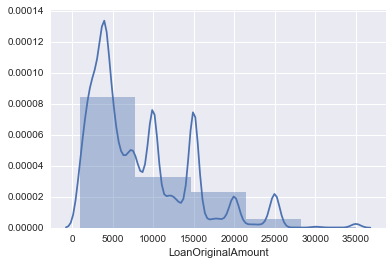

In [34]:
loan_amount = loans[loans.index < '2014-03-01']['LoanOriginalAmount']
ax = sns.distplot(loan_amount,bins=5)

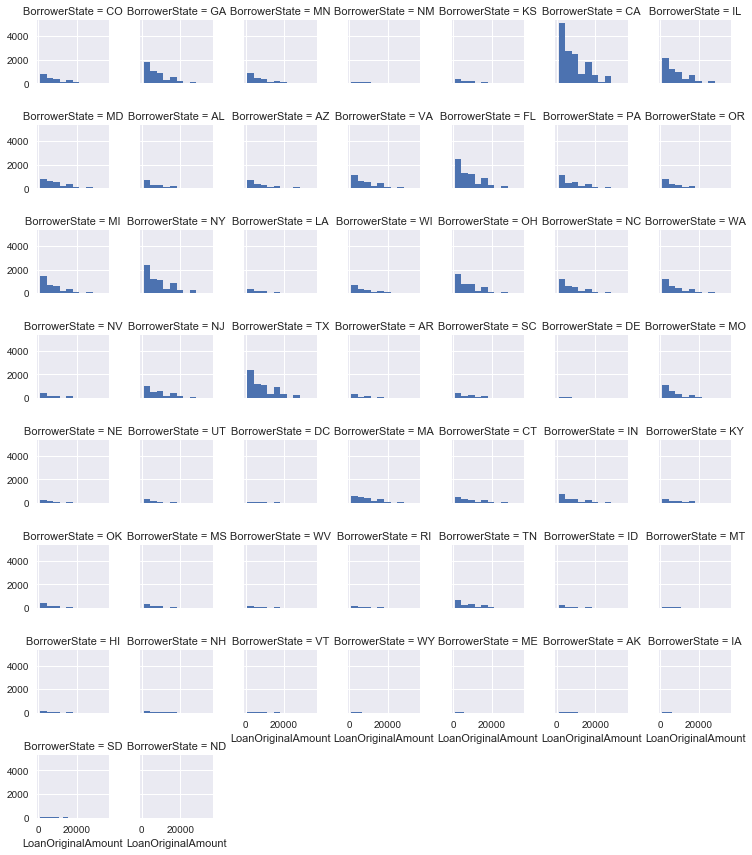

In [41]:
loan_amount = loans[loans.index < '2014-03-01'][['LoanOriginalAmount','BorrowerState']]

g = sns.FacetGrid(loan_amount, col="BorrowerState",col_wrap=7, size=1.5)
g = g.map(plt.hist, "LoanOriginalAmount")
g.savefig('loan_amount_hist')

In [36]:
ct_by_state = loans.groupby('BorrowerState')['ListingNumber'].count()
state_filter = list(ct_by_state[ct_by_state > 2000].index)

In [42]:
def facet_by_date(field):
    state_totals = loans[(loans.index < '2014-03-01')].groupby([field,pd.TimeGrouper('M')])['ListingNumber'].count().reset_index()

    def dateplot(x, y, **kwargs):
        ax = plt.gca()
        data = kwargs.pop("data")
        data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

    g = sns.FacetGrid(state_totals, col=field,col_wrap=5)
    g = g.map_dataframe(dateplot, "LoanOriginationDate", "ListingNumber")
    return g

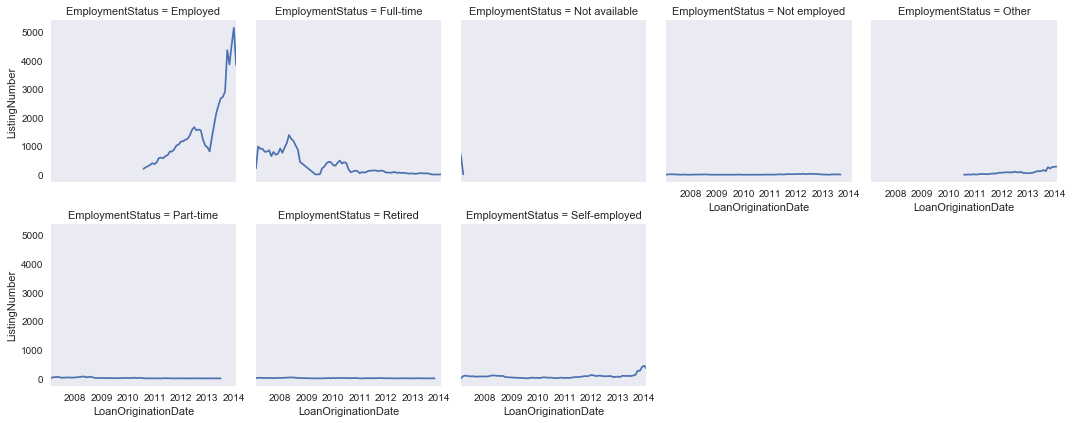

In [43]:
facet_by_date("EmploymentStatus")

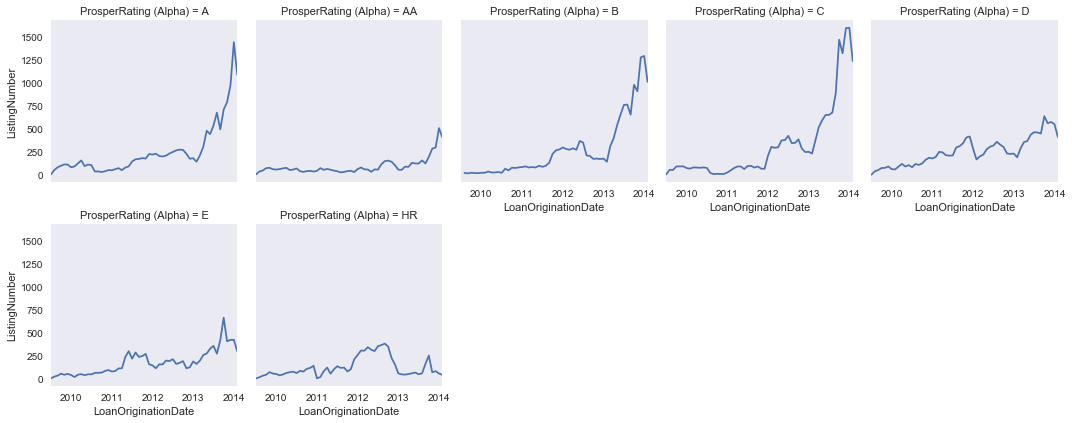

In [44]:
facet_by_date("ProsperRating (Alpha)")

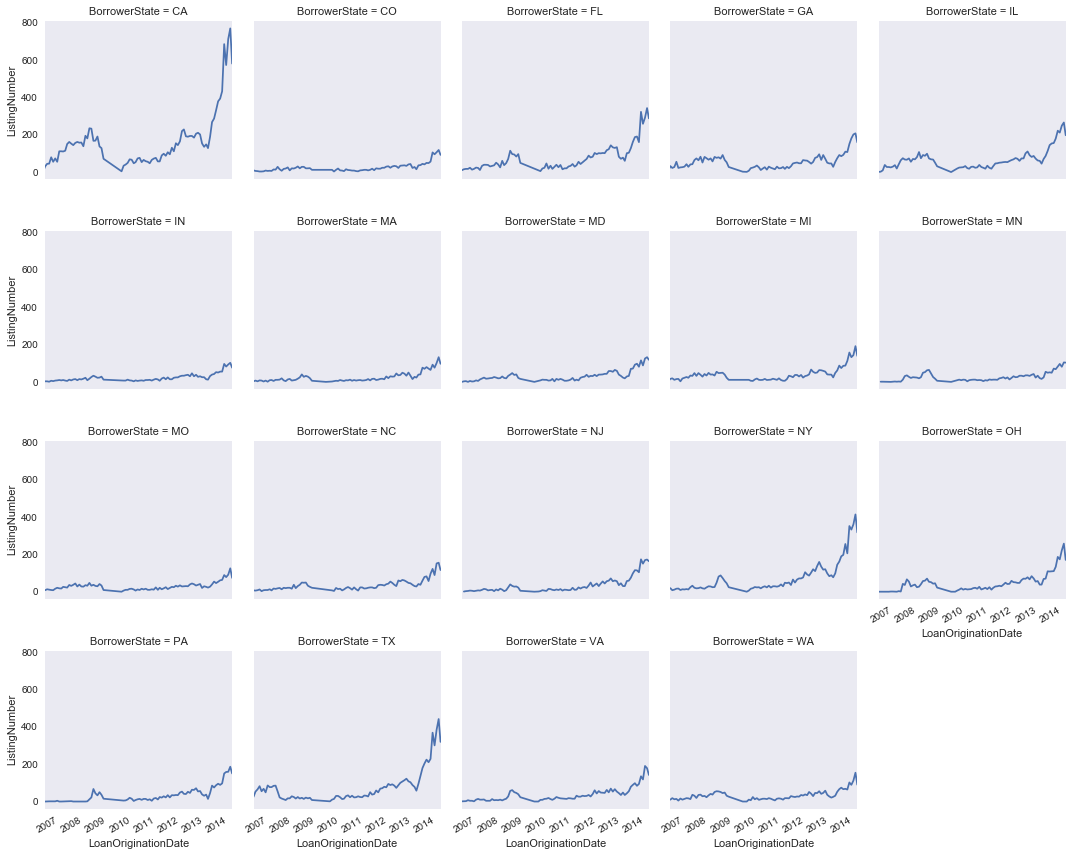

In [47]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

state_totals = loans[(loans.index < '2014-03-01') & (loans.BorrowerState.isin(state_filter))].groupby(['BorrowerState',pd.TimeGrouper('M')])['ListingNumber'].count().reset_index()

g = sns.FacetGrid(state_totals, col="BorrowerState",col_wrap=5)
g = g.map_dataframe(dateplot, "LoanOriginationDate", "ListingNumber").savefig('date_plot_by_state')

In [48]:
incomes = pd.DataFrame(loans[(loans.index < '2014-01-01') & (loans.index > '2007-01-01')].groupby([pd.TimeGrouper('A'),'IncomeRange'])['ListingNumber'].count()).reset_index()

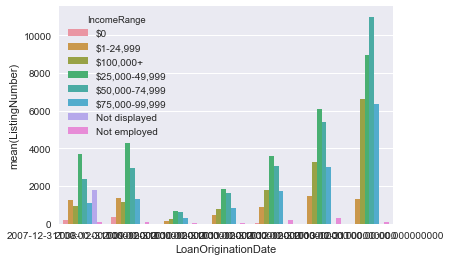

In [49]:
ax = sns.barplot(x="LoanOriginationDate", y="ListingNumber", hue="IncomeRange", data=incomes)

In [133]:
## Looking into number of members and averge loan amount

In [138]:
loans.groupby(pd.TimeGrouper('A')).MemberKey.nunique()

LoanOriginationDate
2005-12-31       21
2006-12-31     5836
2007-12-31    11158
2008-12-31    11428
2009-12-31     2040
2010-12-31     5503
2011-12-31    10768
2012-12-31    18881
2013-12-31    33401
2014-12-31    11731
Freq: A-DEC, Name: MemberKey, dtype: int64

In [140]:
loans.groupby(pd.TimeGrouper('A')).LoanOriginalAmount.mean()

LoanOriginationDate
2005-12-31     3576.681818
2006-12-31     4763.325262
2007-12-31     7049.545026
2008-12-31     6021.628289
2009-12-31     4354.858818
2010-12-31     4766.540340
2011-12-31     6692.021108
2012-12-31     7833.842173
2013-12-31    10545.065599
2014-12-31    11912.219520
Freq: A-DEC, Name: LoanOriginalAmount, dtype: float64

In [ ]:
# What happened in 2009 and 2010?
## Appear that economy hit a bump

In [143]:
loans[(loans.index < '2014-01-01') & (loans.index > '2007-01-01')].groupby(pd.TimeGrouper('A')).BorrowerAPR.median()

LoanOriginationDate
2007-12-31    0.177220
2008-12-31    0.177915
2009-12-31    0.211220
2010-12-31    0.249990
2011-12-31    0.294860
2012-12-31    0.257810
2013-12-31    0.209330
Freq: A-DEC, Name: BorrowerAPR, dtype: float64

In [8]:
#test.to_json('data/us_states_abbr.json')
test1 = pd.read_json('data/us_states.json')

In [9]:
test2 = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District of Columbia",
    "FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    "GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PW": "Palau",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}


In [10]:
def find_state(x):
    state = x['properties']['name']
    x['properties']['abbr'] = test2.keys()[test2.values().index(state)]

test1['features'].apply(find_state)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
48    None
49    None
50    None
51    None
Name: features, dtype: object

In [16]:
output = {v:{'abbr':k} for k,v in test2.items()}

In [17]:
pop = pd.read_csv('data/population.csv')
what = pop[pop.NAME.isin(output.keys())][['NAME','ESTIMATESBASE2010']]

for k,v in output.items():
    #import pdb; pdb.set_trace()
    try:
        p = what.loc[(what.NAME == k),'ESTIMATESBASE2010'].values[0]
        print p
        output[k]['pop'] = p
    except:
        print k

Federated States Of Micronesia
2968103
Palau
Northern Mariana Islands
3751615
563767
5303924
710249
American Samoa
2916025
2059198
6484136
5773786
4533479
25146100
6346298
3046869
5687289
6392301
9884129
2853129
2763888
8001041
3831072
3574114
601766
1316461
1567650
1853011
4625410
37254522
6547813
625741
9688680
672591
12702857
3726157
18804592
1360301
4339344
1052940
Marshall Islands
1826334
5988928
11536727
4780131
12831574
Virgin Islands
814195
5029324
8791953
Guam
6724545
9535688
19378110
989414
2700691
897936
1328364


In [18]:
output

{'Alabama': {'abbr': 'AL', 'pop': 4780131},
 'Alaska': {'abbr': 'AK', 'pop': 710249},
 'American Samoa': {'abbr': 'AS'},
 'Arizona': {'abbr': 'AZ', 'pop': 6392301},
 'Arkansas': {'abbr': 'AR', 'pop': 2916025},
 'California': {'abbr': 'CA', 'pop': 37254522},
 'Colorado': {'abbr': 'CO', 'pop': 5029324},
 'Connecticut': {'abbr': 'CT', 'pop': 3574114},
 'Delaware': {'abbr': 'DE', 'pop': 897936},
 'District of Columbia': {'abbr': 'DC', 'pop': 601766},
 'Federated States Of Micronesia': {'abbr': 'FM'},
 'Florida': {'abbr': 'FL', 'pop': 18804592},
 'Georgia': {'abbr': 'GA', 'pop': 9688680},
 'Guam': {'abbr': 'GU'},
 'Hawaii': {'abbr': 'HI', 'pop': 1360301},
 'Idaho': {'abbr': 'ID', 'pop': 1567650},
 'Illinois': {'abbr': 'IL', 'pop': 12831574},
 'Indiana': {'abbr': 'IN', 'pop': 6484136},
 'Iowa': {'abbr': 'IA', 'pop': 3046869},
 'Kansas': {'abbr': 'KS', 'pop': 2853129},
 'Kentucky': {'abbr': 'KY', 'pop': 4339344},
 'Louisiana': {'abbr': 'LA', 'pop': 4533479},
 'Maine': {'abbr': 'ME', 'pop': 13

## Possible Plots

- chloropleth: circle showing volume AND interactive (play over time) or (select by state)
- histogram: 
- bar:

# README text

Summary - in no more than 4 sentences, briefly introduce your data visualization and add any context that can help readers understand it
Design - explain any design choices you made including changes to the visualization after collecting feedback
Initial design decisions such as chart type, visual encodings, layout, legends, or hierarchy are included at the beginning of the Design section in the README.md file.

## Summary

My D3 visualization maps Prosper (a peer-to-peer lender) loans from 2006 to 2014. The Prosper dataset used includes 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I choose to investigate the progression of lendee state and loan amount to get a picture of where the highest loan density occurs. Once I plotted overall loan density, I included a time component to show the geographic fluctuations in loan density. What I discovered was that the loan density traces the story of Prosper and the US economy as a whole; loan density starts out strongest on the west coast (where Prosper was founded in 2005), then follows the movement of the US economy (with dips in 2008 - 2009).

## Design

TBD

## Feedback

*Jean* (initial sketches)
- Try plotting on some kind of map instead of separating each state into its own plot.
- Noted that bigger / more populous states were also states with more loans.

*Alex* (midway)
- Suggested that I use a continuous color scale to more clearly see loan increase over time.
- Change blacked out states to more washed out color.

*Chris* (midway)
- Add animation, so viewer immediately sees the progression over time.
- Include supplementary charts like bar plot, or something, that compliment the map.
- Create tool tip with additional information about each state


## Resources
- [geoJSON US States and Counties](https://bubinga.co/geojson-us-states-and-counties/)
- [National Population Totals Datasets: 2010-2016](https://www.census.gov/data/datasets/2016/demo/popest/nation-total.html)
- [Basic US State Map Tutorial](https://gist.github.com/michellechandra/0b2ce4923dc9b5809922)
- [D3 Scale Chromatic](https://github.com/d3/d3-scale-chromatic)
- [D3.js Slider Examples](http://thematicmapping.org/playground/d3/d3.slider/)